In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

all of the images need to have a constant size

pendants and attachments - I need a specific place to place them per each of the guns

skins are going to be appliable over the actual gun

pendants:
    pinata
    dice
    4_leaf
    gold_medal
    disco
    
attachments:
    thermal_scope
    acog
    flamethrower
    grenade_launcher
    green_laser
    red_laser
    holo_scope
    suppressor
    red_dot
    
skins: 
    1
    2
    3
    4
    5
    6
    7
    8
    9 

total: 5 pendants * 9 attachments * 9 skins = 405 unique combinations

all the gun have to be extracted from the png and then the attachements, skins etc added and the whole thing has to be put in the center of the png

for some attachements there are going to be additional things to put in the up-left corner

and the name of the gun is in the bottom-left corner

In [2]:
pinata_spaz = cv2.imread('./data/Spaz12/PInata KC.png', cv2.IMREAD_UNCHANGED)

In [3]:
pinata_deagle = cv2.imread('./data/Deagle/PInata KC.png', cv2.IMREAD_UNCHANGED)

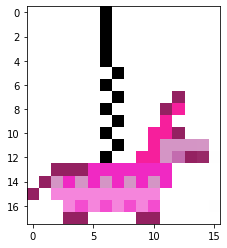

In [4]:
plt.imshow(pinata_deagle)

In [5]:
np.testing.assert_equal(pinata_spaz, pinata_deagle)

---

In [6]:
mp5 = cv2.imread('./data/MP5/MP5.png', cv2.IMREAD_UNCHANGED)

In [7]:
pinata_mp5 = cv2.imread('./data/MP5/PInata KC.png', cv2.IMREAD_UNCHANGED)

In [8]:
from crop_weapon import crop_weapon

In [9]:
skin = cv2.imread('./data/MP5/Skin 9.png', cv2.IMREAD_UNCHANGED)

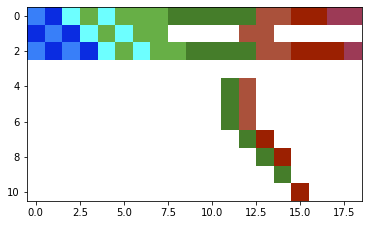

In [10]:
plt.imshow(skin)

In [11]:
skin.shape

(11, 19, 4)

In [12]:
crop_weapon(mp5).shape

(16, 40, 4)

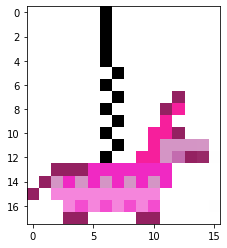

In [13]:
plt.imshow(pinata_mp5)

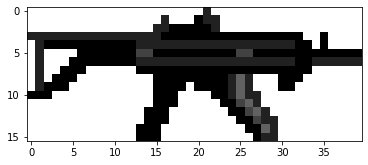

In [14]:
plt.imshow(crop_weapon(mp5))

In [15]:
attachments_dict = {
    # todo
}

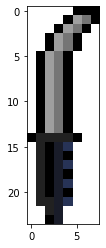

In [59]:
path = 'data/Knife/Knife.png'
weapon = crop_weapon(cv2.imread(path, cv2.IMREAD_UNCHANGED))
plt.imshow(weapon)

In [60]:
save_name = 'Knife.png'
cv2.imwrite('weapons/' + save_name, weapon)

True

In [61]:
ls ./weapons/

Ak47.png          HuntingRifle.png  MP5.png           Revolver.png
DB.png            Knife.png         RPG.png           Spaz12.png
Deagle.png        L96.png           RayGun.png        p90.png


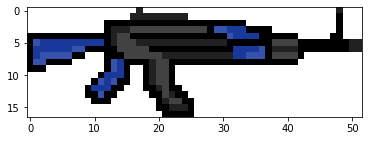

In [65]:
plt.imshow(cv2.imread('./weapons/Ak47.png', cv2.IMREAD_UNCHANGED))

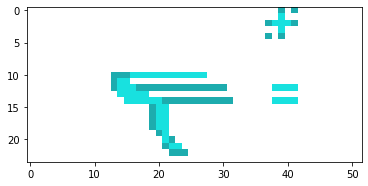

In [68]:
plt.imshow(cv2.imread('./skins/Ak47_1.png', cv2.IMREAD_UNCHANGED))

In [72]:
skin1 = cv2.imread('./data/AK47/Skin 1.png', cv2.IMREAD_UNCHANGED)

In [74]:
skin2 = cv2.imread('./data/AK47/Skin 8.png', cv2.IMREAD_UNCHANGED)

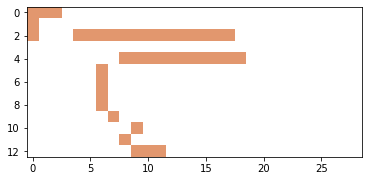

In [73]:
plt.imshow(skin1)

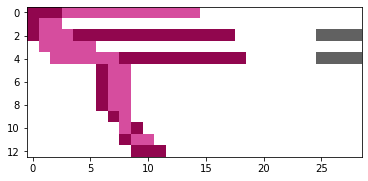

In [75]:
plt.imshow(skin2)

In [76]:
import os

In [80]:
for i in os.listdir('skins'):
    assert len(os.listdir('skins/' + i)) == 9

In [81]:
from glob import glob

In [82]:
ak_skins = [cv2.imread(i, cv2.IMREAD_UNCHANGED) 
            for i in glob('skins/Ak47/*.png')]

In [84]:
skin = ak_skins[0]

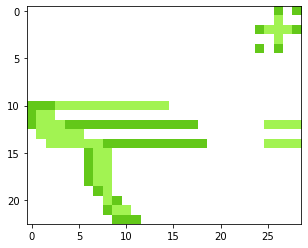

In [86]:
plt.imshow(skin)

In [88]:
skin.shape

(23, 29, 4)

In [87]:
skin[-1].shape

(29, 4)

In [92]:
skin[-1]

array([[255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [226, 151, 110,   0],
       [ 99, 200,  25, 255],
       [ 99, 200,  25, 255],
       [ 99, 200,  25, 255],
       [226, 151, 110,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0]], dtype=uint8)

In [90]:
np.where(skin[-1].m != 0)

(array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
         5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15,
        16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21,
        21, 22, 22, 22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27,
        27, 27, 28, 28, 28]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1,
        2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2]))

In [ ]:
def get_skin_bottom_px(skin):
    skin